## Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_validate
from feature_importance import FeatureImportance


ModuleNotFoundError: No module named 'feature_importance'

## Load Data 

In [4]:
df_22 = pd.read_csv('../raw_data/fifa22/players_22.csv')
df_21 = pd.read_csv('../raw_data/fifa22/players_21.csv')
df_20 = pd.read_csv('../raw_data/fifa22/players_20.csv')
df_19 = pd.read_csv('../raw_data/fifa22/players_19.csv')
df_18 = pd.read_csv('../raw_data/fifa22/players_18.csv')
df_17 = pd.read_csv('../raw_data/fifa22/players_17.csv')
df_16 = pd.read_csv('../raw_data/fifa22/players_16.csv')
df_15 = pd.read_csv('../raw_data/fifa22/players_15.csv')

/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_91446/3992483976.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_22 = pd.read_csv('../raw_data/fifa22/players_22.csv')
/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_91446/3992483976.py:5: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_18 = pd.read_csv('../raw_data/fifa22/players_18.csv')
/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_91446/3992483976.py:7: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  df_16 = pd.read_csv('../raw_data/fifa22/players_16.csv')
/var/folders/tc/0tkkgmdd25n0rh3_pjfhw6mw0000gp/T/ipykernel_91446/3992483976.py:8: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  df_15 = pd.read_csv('../raw_data/fifa22/players_15.csv')


In [5]:
for index, col in enumerate(df_22.columns):
    print(f"{col:<26} | ", end="")
    if (index % 3 == 2):
        print("\n", end="")

sofifa_id                  | player_url                 | short_name                 | 
long_name                  | player_positions           | overall                    | 
potential                  | value_eur                  | wage_eur                   | 
age                        | dob                        | height_cm                  | 
weight_kg                  | club_team_id               | club_name                  | 
league_name                | league_level               | club_position              | 
club_jersey_number         | club_loaned_from           | club_joined                | 
club_contract_valid_until  | nationality_id             | nationality_name           | 
nation_team_id             | nation_position            | nation_jersey_number       | 
preferred_foot             | weak_foot                  | skill_moves                | 
international_reputation   | work_rate                  | body_type                  | 
real_face                  | rel

In [6]:
to_drop = ['club_logo_url','nation_flag_url','club_flag_url','nation_logo_url','player_face_url','dob','player_url',
           'real_face','nation_jersey_number','nation_position','club_loaned_from','long_name','player_url'
          ,'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
           'rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','club_jersey_number','nationality_id','club_jersey_number',
          'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking' ,'goalkeeping_positioning' ,'goalkeeping_reflexes', 'goalkeeping_speed']



In [7]:
df22 = df_22.drop(to_drop, axis = 1)
df21 = df_21.drop(to_drop, axis = 1)
df20 = df_20.drop(to_drop, axis = 1)
df19 = df_19.drop(to_drop, axis = 1)
df18 = df_18.drop(to_drop, axis = 1)
df17 = df_17.drop(to_drop, axis = 1)
df16 = df_16.drop(to_drop, axis = 1)
df15 = df_15.drop(to_drop, axis = 1)

In [8]:
def is_bench(d):
    if d in ("SUB", "RES", ""):
        return True 
    return False

In [9]:
dfs = [df18, df19, df20, df21,df22,df17,df16,df15]

for frame in dfs:
    frame['is_bench'] = frame['club_position'].apply(is_bench)
    frame['potential_diff'] = frame['potential'] - frame['overall']
    frame[['att_rate', 'def_rate']] = frame['work_rate'].str.split('/', 1, expand=True)

In [10]:
pos22 = df22['player_positions']
pos21 = df21['player_positions']
pos20 = df20['player_positions']
pos19 = df19['player_positions']
pos18 = df18['player_positions']
pos17 = df17['player_positions']
pos16 = df16['player_positions']
pos15 = df15['player_positions']


pref_pos_22 = []
pref_pos_21 = []
pref_pos_20 = []
pref_pos_19 = []
pref_pos_18 = []
pref_pos_17 = []
pref_pos_16 = []
pref_pos_15 = []

In [11]:
pos = [pos18, pos19, pos20, pos21,pos22,pos17,pos16,pos15]

for i in pos22:
    a = i.split(',')
    pref_pos_22.append(a[0])
df22['prefered_pos'] = pref_pos_22

for i in pos21:
    a = i.split(',')
    pref_pos_21.append(a[0])
df21['prefered_pos'] = pref_pos_21


for i in pos20:
    a = i.split(',')
    pref_pos_20.append(a[0])
df20['prefered_pos'] = pref_pos_20

for i in pos19:
    a = i.split(',')
    pref_pos_19.append(a[0])
df19['prefered_pos'] = pref_pos_19

for i in pos18:
    a = i.split(',')
    pref_pos_18.append(a[0])
df18['prefered_pos'] = pref_pos_18

for i in pos17:
    a = i.split(',')
    pref_pos_17.append(a[0])
df17['prefered_pos'] = pref_pos_17

for i in pos16:
    a = i.split(',')
    pref_pos_16.append(a[0])
df16['prefered_pos'] = pref_pos_16

for i in pos15:
    a = i.split(',')
    pref_pos_15.append(a[0])
df15['prefered_pos'] = pref_pos_15  



In [105]:
# dfs = [df18, df19, df20, df21,df22,df17,df16,df15]

# for frame in dfs:
#     frame = frame[frame['prefered_pos']!= 'GK']

# print(df22[df22['prefered_pos']!= 'GK'].shape,df22.shape)


(17107, 67) (19239, 67)


In [12]:
df22 = df22.drop('player_positions', axis = 1)
df21 = df21.drop('player_positions', axis = 1)
df20 = df20.drop('player_positions', axis = 1)
df19 = df19.drop('player_positions', axis = 1)
df18 = df18.drop('player_positions', axis = 1)
df17 = df17.drop('player_positions', axis = 1)
df16 = df16.drop('player_positions', axis = 1)
df15 = df15.drop('player_positions', axis = 1)

df22['prefered_pos'] = df22['prefered_pos'].astype('category')
df21['prefered_pos'] = df21['prefered_pos'].astype('category')
df20['prefered_pos'] = df20['prefered_pos'].astype('category')
df19['prefered_pos'] = df19['prefered_pos'].astype('category')
df18['prefered_pos'] = df18['prefered_pos'].astype('category')
df17['prefered_pos'] = df17['prefered_pos'].astype('category')
df16['prefered_pos'] = df16['prefered_pos'].astype('category')
df15['prefered_pos'] = df15['prefered_pos'].astype('category')




## Join Dataframes

In [ ]:
# years = [21, 20]
# for year in years:
#     f'overall_{year}'

In [13]:
df_all = df22.merge(df21, how='outer',left_on='sofifa_id', right_on='sofifa_id', suffixes=(None, '_21'))
df_all = df_all.merge(df20, how='outer',left_on='sofifa_id', right_on='sofifa_id', suffixes=(None,'_20'))
df_all = df_all.merge(df19, how='outer',left_on='sofifa_id', right_on='sofifa_id', suffixes=(None, '_19'))
df_all = df_all.merge(df18, how='outer',left_on='sofifa_id', right_on='sofifa_id', suffixes=(None, '_18'))
df_all = df_all.merge(df17, how='outer',left_on='sofifa_id', right_on='sofifa_id', suffixes=(None, '_17'))
df_all = df_all.merge(df16, how='outer',left_on='sofifa_id', right_on='sofifa_id', suffixes=(None, '_16'))
df_all = df_all.merge(df15, how='outer',left_on='sofifa_id', right_on='sofifa_id', suffixes=(None, '_15'))

In [15]:
for index, col in enumerate(df_all.columns):
    print(f"{col:<26} | ", end="")
    if (index % 3 == 2):
        print("\n", end="")

sofifa_id                  | short_name                 | overall                    | 
potential                  | value_eur                  | wage_eur                   | 
age                        | height_cm                  | weight_kg                  | 
club_team_id               | club_name                  | league_name                | 
league_level               | club_position              | club_joined                | 
club_contract_valid_until  | nationality_name           | nation_team_id             | 
preferred_foot             | weak_foot                  | skill_moves                | 
international_reputation   | work_rate                  | body_type                  | 
release_clause_eur         | player_tags                | player_traits              | 
pace                       | shooting                   | passing                    | 
dribbling                  | defending                  | physic                     | 
attacking_crossing         | att

In [16]:
df_all

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,mentality_penalties_15,mentality_composure_15,defending_marking_awareness_15,defending_standing_tackle_15,defending_sliding_tackle_15,is_bench_15,potential_diff_15,att_rate_15,def_rate_15,prefered_pos_15
0,158023,L. Messi,93.0,93.0,78000000.0,320000.0,34.0,170.0,72.0,73.0,...,76.0,NaN,25.0,21.0,20.0,False,2.0,Medium,Low,CF
1,188545,R. Lewandowski,92.0,92.0,119500000.0,270000.0,32.0,185.0,81.0,21.0,...,77.0,NaN,25.0,42.0,25.0,False,2.0,High,Medium,ST
2,20801,Cristiano Ronaldo,91.0,91.0,45000000.0,270000.0,36.0,187.0,83.0,11.0,...,85.0,NaN,22.0,31.0,23.0,False,0.0,High,Low,LW
3,190871,Neymar Jr,91.0,91.0,129000000.0,270000.0,29.0,175.0,68.0,73.0,...,81.0,NaN,21.0,24.0,33.0,False,5.0,High,Medium,LW
4,192985,K. De Bruyne,91.0,91.0,125500000.0,350000.0,30.0,181.0,70.0,10.0,...,75.0,NaN,37.0,39.0,40.0,False,5.0,High,Medium,CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45624,225340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,NaN,40.0,52.0,51.0,True,6.0,Medium,Medium,CB
45625,221338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,NaN,39.0,44.0,43.0,True,12.0,Low,Medium,CB
45626,224829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,NaN,25.0,25.0,25.0,True,6.0,Medium,Medium,GK
45627,220549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.0,NaN,25.0,25.0,25.0,True,13.0,Medium,Medium,LM


In [17]:
df_plot=df_all[['sofifa_id','overall_15','overall_16','overall_17','overall_18','overall_19','overall_20','overall_21','overall']]


In [18]:
df_all

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,mentality_penalties_15,mentality_composure_15,defending_marking_awareness_15,defending_standing_tackle_15,defending_sliding_tackle_15,is_bench_15,potential_diff_15,att_rate_15,def_rate_15,prefered_pos_15
0,158023,L. Messi,93.0,93.0,78000000.0,320000.0,34.0,170.0,72.0,73.0,...,76.0,NaN,25.0,21.0,20.0,False,2.0,Medium,Low,CF
1,188545,R. Lewandowski,92.0,92.0,119500000.0,270000.0,32.0,185.0,81.0,21.0,...,77.0,NaN,25.0,42.0,25.0,False,2.0,High,Medium,ST
2,20801,Cristiano Ronaldo,91.0,91.0,45000000.0,270000.0,36.0,187.0,83.0,11.0,...,85.0,NaN,22.0,31.0,23.0,False,0.0,High,Low,LW
3,190871,Neymar Jr,91.0,91.0,129000000.0,270000.0,29.0,175.0,68.0,73.0,...,81.0,NaN,21.0,24.0,33.0,False,5.0,High,Medium,LW
4,192985,K. De Bruyne,91.0,91.0,125500000.0,350000.0,30.0,181.0,70.0,10.0,...,75.0,NaN,37.0,39.0,40.0,False,5.0,High,Medium,CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45624,225340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,NaN,40.0,52.0,51.0,True,6.0,Medium,Medium,CB
45625,221338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.0,NaN,39.0,44.0,43.0,True,12.0,Low,Medium,CB
45626,224829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,NaN,25.0,25.0,25.0,True,6.0,Medium,Medium,GK
45627,220549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.0,NaN,25.0,25.0,25.0,True,13.0,Medium,Medium,LM


In [19]:
df_all['is_bench_21'] = df_all['is_bench_21'].astype('bool')
df_all['is_bench_20'] = df_all['is_bench_20'].astype('bool')
df_all['is_bench_19'] = df_all['is_bench_19'].astype('bool')
df_all['is_bench_18'] = df_all['is_bench_18'].astype('bool')
df_all['is_bench_17'] = df_all['is_bench_17'].astype('bool')
df_all['is_bench_16'] = df_all['is_bench_16'].astype('bool')
df_all['is_bench_15'] = df_all['is_bench_15'].astype('bool')

In [20]:
df_all.select_dtypes("bool").nunique()

is_bench_21    2
is_bench_20    2
is_bench_19    2
is_bench_18    2
is_bench_17    2
is_bench_16    2
is_bench_15    2
dtype: int64

In [21]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45629 entries, 0 to 45628
Columns: 529 entries, sofifa_id to prefered_pos_15
dtypes: bool(7), category(8), float64(408), int64(1), object(105)
memory usage: 179.9+ MB


In [19]:
# df_all.select_dtypes("float64").nunique()

df_all.work_rate.value_counts()

Medium/Medium    10015
High/Medium       3661
Medium/High       1880
High/High         1099
Medium/Low         810
High/Low           808
Low/Medium         466
Low/High           455
Low/Low             45
Name: work_rate, dtype: int64

In [22]:
feat_categorical_nunique = df_all.select_dtypes("object").nunique()
feat_categorical_nunique

short_name          18145
club_name             701
league_name            55
club_position          29
club_joined          1845
                    ...  
body_type_15           10
player_tags_15         59
player_traits_15      829
att_rate_15             3
def_rate_15             3
Length: 105, dtype: int64

In [23]:
feat_categorical_small = feat_categorical_nunique[feat_categorical_nunique < 10]
feat_categorical_small

preferred_foot       2
work_rate            9
is_bench             2
att_rate             3
def_rate             3
preferred_foot_21    2
work_rate_21         9
att_rate_21          3
def_rate_21          3
preferred_foot_20    2
work_rate_20         9
att_rate_20          3
def_rate_20          3
preferred_foot_19    2
work_rate_19         9
att_rate_19          3
def_rate_19          3
preferred_foot_18    2
work_rate_18         9
att_rate_18          3
def_rate_18          3
preferred_foot_17    2
work_rate_17         9
att_rate_17          3
def_rate_17          3
preferred_foot_16    2
work_rate_16         9
att_rate_16          3
def_rate_16          3
preferred_foot_15    2
work_rate_15         9
att_rate_15          3
def_rate_15          3
dtype: int64

In [24]:
wk_drop = ['work_rate','work_rate_21','work_rate_20','work_rate_19',
           'work_rate_18','work_rate_17','work_rate_16','work_rate_15']

df_all = df_all.drop(wk_drop, axis = 1)

In [25]:
df_all[['short_name','short_name_20','short_name_15','short_name_16','short_name_17']]

,short_name,short_name_20,short_name_15,short_name_16,short_name_17
0,L. Messi,L. Messi,L. Messi,L. Messi,L. Messi
1,R. Lewandowski,R. Lewandowski,R. Lewandowski,R. Lewandowski,R. Lewandowski
2,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo
3,Neymar Jr,Neymar Jr,Neymar,Neymar,Neymar
4,K. De Bruyne,K. De Bruyne,K. De Bruyne,K. De Bruyne,K. De Bruyne
...,...,...,...,...,...
45624,NaN,NaN,B. Jackson,NaN,NaN
45625,NaN,NaN,M. Fissore,NaN,NaN
45626,NaN,NaN,H. Reynolds,NaN,NaN
45627,NaN,NaN,L. Davies,NaN,NaN


## Pipeline

In [106]:
# Preprocessor

# num_transformer = make_pipeline(SimpleImputer(), MinMaxScaler())

# cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=True)
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

num_transformer = make_pipeline(SimpleImputer(strategy='mean'), MinMaxScaler())
num_col = make_column_selector(dtype_include=['int64','float64'])

cat_transformer = make_pipeline(SimpleImputer(strategy = 'most_frequent')
                                ,OneHotEncoder(handle_unknown='ignore', sparse=True)
                               )

cat_col = make_column_selector(dtype_include=['object','bool','category'])

preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['float64','int64'])),
    (cat_transformer, cat_col),
    remainder='passthrough')



# Add Estimator
# pipe = make_pipeline(preproc, Lasso(alpha=0.2))
pipe = make_pipeline(preproc, LinearRegression())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x134af5130>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x134af5e50>)])),
                ('linearregression', LinearRegression())])

In [73]:
## Filter df_all to keep overall of 2022 and features of 2021


# 2021 features
# X=df_all.drop(columns='overall')
cols = [col for col in df_all.columns if '_21' in col or 'value_eur' == col]

df = df_all[cols]
new_df = df[df['value_eur'].notnull()&df['short_name_21'].notnull()]
# df_all[cols].isna().sum()

# # new_df = df_all[cols].dropna(axis=0, how='all')
# # X = new_df.drop(columns='overall').dropna(axis=0)
X = new_df.drop(columns='value_eur')
# # cols
# # # X = df_all[cols].dropna(axis=0,how='all')
y = new_df.value_eur
# # # X
# # X

In [74]:
X

,short_name_21,overall_21,potential_21,value_eur_21,wage_eur_21,age_21,height_cm_21,weight_kg_21,club_team_id_21,club_name_21,...,mentality_penalties_21,mentality_composure_21,defending_marking_awareness_21,defending_standing_tackle_21,defending_sliding_tackle_21,is_bench_21,potential_diff_21,att_rate_21,def_rate_21,prefered_pos_21
0,L. Messi,93.0,93.0,103500000.0,560000.0,33.0,170.0,72.0,241.0,FC Barcelona,...,75.0,96.0,32.0,35.0,24.0,False,0.0,Medium,Low,RW
1,R. Lewandowski,91.0,91.0,111000000.0,240000.0,31.0,184.0,80.0,21.0,FC Bayern München,...,88.0,88.0,35.0,42.0,19.0,False,0.0,High,Medium,ST
2,Cristiano Ronaldo,92.0,92.0,63000000.0,220000.0,35.0,187.0,83.0,45.0,Juventus,...,84.0,95.0,28.0,32.0,24.0,False,0.0,High,Low,ST
3,Neymar Jr,91.0,91.0,132000000.0,270000.0,28.0,175.0,68.0,73.0,Paris Saint-Germain,...,92.0,93.0,35.0,30.0,29.0,False,0.0,High,Medium,LW
4,K. De Bruyne,91.0,91.0,129000000.0,370000.0,29.0,181.0,70.0,10.0,Manchester City,...,84.0,91.0,68.0,65.0,53.0,False,0.0,High,High,CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,Zhang Wei,49.0,57.0,100000.0,1000.0,20.0,186.0,74.0,112978.0,Hebei FC,...,36.0,43.0,46.0,52.0,46.0,True,8.0,Medium,Medium,RM
19185,P. McGarvey,48.0,58.0,80000.0,500.0,16.0,180.0,76.0,111131.0,Finn Harps,...,17.0,38.0,5.0,10.0,13.0,True,10.0,Medium,Medium,GK
19188,Guo Yunqi,48.0,53.0,70000.0,1000.0,23.0,175.0,68.0,112985.0,Shijiazhuang Ever Bright F.C.,...,41.0,40.0,43.0,48.0,44.0,True,5.0,Low,Low,CM
19220,D. Collins,48.0,61.0,110000.0,500.0,19.0,174.0,68.0,563.0,Sligo Rovers,...,40.0,50.0,39.0,29.0,27.0,True,13.0,Medium,Medium,ST


In [75]:
X_train22, X_test22, y_train22, y_test22 = train_test_split(X, y, test_size=0.3,random_state=10)

In [108]:
pipe.fit(X_train22,y_train22)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x134af5130>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x134af5e50>)])),
                ('linearregression', LinearRegression())])

<BarContainer object of 21 artists>

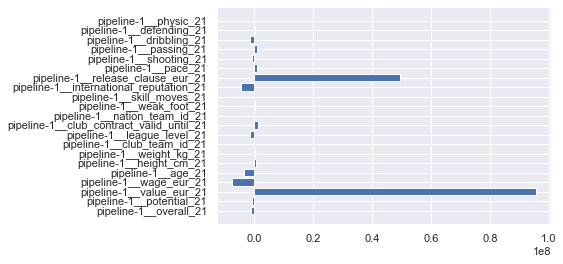

In [112]:
plt.barh(pipe[:-1].get_feature_names_out()[0:21],pipe[-1].coef_[0:21])


In [124]:
(new_df.groupby('age_21','league_level_21')['value_eur'].agg(['var','median']))

ValueError: No axis named league_level_21 for object type DataFrame

In [113]:
len(pipe[:-1].get_feature_names_out())

12106

In [77]:
pipe.predict(X_test22.iloc[0:2])

array([6017343.34231355,  436961.59239022])

In [99]:
# pipe[-1].coef_[pipe[-1].coef_ != 0]
# plt.bar(pipe.feature_names_in_, pipe[-1].coef_)
# pipe.get_feature_names_out()
# pipe[:-1].get_feature_names_out()
# pipe[:-1].get_feature_names_out()
# pipe[:-1].named_steps["columntransformer"].get_feature_names_out()

In [85]:
from sklearn.model_selection import cross_val_score,cross_validate

# pipe.fit(X,y)
# pipe.score(X,y)
# pipe.predict(new_data)
cv_results = cross_validate(pipe, X_train22, y_train22, cv=5, 
                            scoring=['neg_mean_absolute_error','r2']
                           )
pd.DataFrame(cv_results)

,fit_time,score_time,test_neg_mean_absolute_error,test_r2
0,1.281172,0.070041,-2.090403e+06,0.829273
1,1.124896,0.057626,-1.898122e+06,0.821520
2,1.067990,0.062612,-1.938309e+06,0.849740
3,1.102597,0.064257,-2.024564e+06,0.799233
4,1.179876,0.056139,-2.024613e+06,0.830087


In [83]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [79]:
predicted_overall = pipe.predict(X_test22)
predicted_overall

array([ 6017343.34231355,   436961.59239022, -1509714.63370387, ...,
        8686262.77258582, 17415587.63371428,  2775406.71722659])

In [92]:
predictions = {'y_pred' : predicted_overall,
             'y_true': y_test22}

# comparison = pd.dataframe({y_true:[y_test22,pd.Series(predicted_overall,name ='Pred_Overall')],axis = 1)
# comparison

pd.DataFrame(predictions).sort_index()

,y_pred,y_true
4,1.185641e+08,125500000.0
13,6.963623e+07,104000000.0
18,8.087641e+07,94000000.0
19,8.646843e+07,108000000.0
21,7.830170e+07,119500000.0
...,...,...
18917,7.720154e+05,140000.0
19006,1.310512e+06,110000.0
19103,2.524278e+05,120000.0
19117,-3.522981e+05,70000.0


In [93]:
new_df[4:]

,value_eur,short_name_21,overall_21,potential_21,value_eur_21,wage_eur_21,age_21,height_cm_21,weight_kg_21,club_team_id_21,...,mentality_penalties_21,mentality_composure_21,defending_marking_awareness_21,defending_standing_tackle_21,defending_sliding_tackle_21,is_bench_21,potential_diff_21,att_rate_21,def_rate_21,prefered_pos_21
4,125500000.0,K. De Bruyne,91.0,91.0,129000000.0,370000.0,29.0,181.0,70.0,10.0,...,84.0,91.0,68.0,65.0,53.0,False,0.0,High,High,CAM
5,112000000.0,J. Oblak,91.0,93.0,120000000.0,125000.0,27.0,188.0,87.0,240.0,...,11.0,68.0,27.0,12.0,18.0,False,2.0,Medium,Medium,GK
6,194000000.0,K. Mbappé,90.0,95.0,185500000.0,160000.0,21.0,178.0,73.0,73.0,...,70.0,84.0,34.0,34.0,32.0,False,5.0,High,Low,ST
7,13500000.0,M. Neuer,89.0,89.0,17500000.0,130000.0,34.0,193.0,92.0,21.0,...,47.0,70.0,17.0,10.0,11.0,False,0.0,Medium,Medium,GK
8,99000000.0,M. ter Stegen,90.0,93.0,110000000.0,260000.0,28.0,187.0,85.0,241.0,...,25.0,70.0,25.0,13.0,10.0,False,3.0,Medium,Medium,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19180,110000.0,Zhang Wei,49.0,57.0,100000.0,1000.0,20.0,186.0,74.0,112978.0,...,36.0,43.0,46.0,52.0,46.0,True,8.0,Medium,Medium,RM
19185,80000.0,P. McGarvey,48.0,58.0,80000.0,500.0,16.0,180.0,76.0,111131.0,...,17.0,38.0,5.0,10.0,13.0,True,10.0,Medium,Medium,GK
19188,70000.0,Guo Yunqi,48.0,53.0,70000.0,1000.0,23.0,175.0,68.0,112985.0,...,41.0,40.0,43.0,48.0,44.0,True,5.0,Low,Low,CM
19220,100000.0,D. Collins,48.0,61.0,110000.0,500.0,19.0,174.0,68.0,563.0,...,40.0,50.0,39.0,29.0,27.0,True,13.0,Medium,Medium,ST


In [90]:
len(predicted_overall)

3975

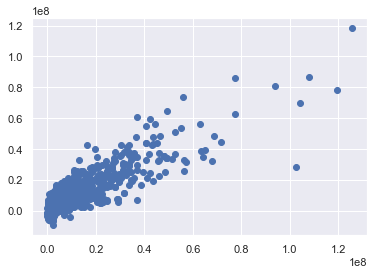

In [99]:
plt.scatter(y_test22,predicted_overall)


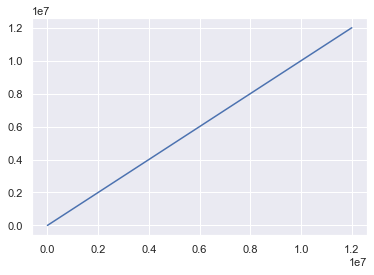

In [102]:
plt.plot(range(0,12000000),range(0,12000000))